In [2]:
import pyspark as ps 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
spark = (ps.sql.SparkSession.builder
       .master("local[4]")
       .appName("sparkSQL exercise")
       .getOrCreate()
       )

In [4]:
sc = spark.sparkContext

In [5]:
sc


<SparkContext master=local[4] appName=sparkSQL exercise>

In [6]:
df = spark.read.csv('../../../../Desktop/DSI/Data_Sets/245_1 .csv',
                   header = True,
                   quote = '"',
                   sep = ',',
                   inferSchema = True)

In [7]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- dateAdded: timestamp (nullable = true)
 |-- dateUpdated: timestamp (nullable = true)
 |-- ean: string (nullable = true)
 |-- keys: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- manufacturerNumber: string (nullable = true)
 |-- name: string (nullable = true)
 |-- reviews.date: string (nullable = true)
 |-- reviews.dateAdded: timestamp (nullable = true)
 |-- reviews.dateSeen: string (nullable = true)
 |-- reviews.didPurchase: boolean (nullable = true)
 |-- reviews.doRecommend: boolean (nullable = true)
 |-- reviews.id: integer (nullable = true)
 |-- reviews.numHelpful: integer (nullable = true)
 |-- reviews.rating: integer (nullable = true)
 |-- reviews.sourceURLs: string (nullable = true)
 |-- reviews.text: string (nullable = true)
 |-- reviews.title: string (nullable = true)
 |-- reviews.userCity: string (nullable = true)
 |-- reviews.us

In [8]:
df.describe()


DataFrame[summary: string, id: string, brand: string, categories: string, ean: string, keys: string, manufacturer: string, manufacturerNumber: string, name: string, reviews.date: string, reviews.dateSeen: string, reviews.id: string, reviews.numHelpful: string, reviews.rating: string, reviews.sourceURLs: string, reviews.text: string, reviews.title: string, reviews.userCity: string, reviews.userProvince: string, reviews.username: string, upc: string]

In [9]:
df = df.withColumnRenamed('reviews.date','reviewsdate').withColumnRenamed("reviews.didPurchase","didPurchase").withColumnRenamed('reviews.doRecommend','doRecommend').withColumnRenamed('reviews.rating','reviewsrating').withColumnRenamed('reviews.text','reviewstext').withColumnRenamed('reviews.title','reviewstitle').withColumnRenamed('reviews.sourceURLs','URL')


In [10]:
df.createOrReplaceTempView('df_reviews')

In [11]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- dateAdded: timestamp (nullable = true)
 |-- dateUpdated: timestamp (nullable = true)
 |-- ean: string (nullable = true)
 |-- keys: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- manufacturerNumber: string (nullable = true)
 |-- name: string (nullable = true)
 |-- reviewsdate: string (nullable = true)
 |-- reviews.dateAdded: timestamp (nullable = true)
 |-- reviews.dateSeen: string (nullable = true)
 |-- didPurchase: boolean (nullable = true)
 |-- doRecommend: boolean (nullable = true)
 |-- reviews.id: integer (nullable = true)
 |-- reviews.numHelpful: integer (nullable = true)
 |-- reviewsrating: integer (nullable = true)
 |-- URL: string (nullable = true)
 |-- reviewstext: string (nullable = true)
 |-- reviewstitle: string (nullable = true)
 |-- reviews.userCity: string (nullable = true)
 |-- reviews.userProvince: string (nullable = true

In [12]:
df_sql_brand = spark.sql("SELECT brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL,upc FROM df_reviews")
df_sql_brand.show(10)

+---------------+--------------------+--------------------+--------------------+--------------------+-----------+-----------+-------------+--------------------+------------------+--------------------+-----------+
|          brand|          categories|        manufacturer|                name|         reviewsdate|didPurchase|doRecommend|reviewsrating|         reviewstext|      reviewstitle|                 URL|        upc|
+---------------+--------------------+--------------------+--------------------+--------------------+-----------+-----------+-------------+--------------------+------------------+--------------------+-----------+
|Universal Music|Movies, Music & B...|Universal Music G...|Pink Friday: Roma...|2012-11-30T06:21:...|       null|       null|            5|i love this album...|      Just Awesome|https://redsky.ta...|6.02537E+11|
|       Lundberg|Food,Packaged Foo...|            Lundberg|Lundberg Organic ...|2017-07-09T00:00:...|       true|       null|            5|Good flav

In [13]:
pandas_df = df_sql_brand.toPandas()


In [14]:
pandas_df= pandas_df.replace("L'oreal Paris","L'Oreal Paris")

In [15]:
len(pandas_df)


71044

In [16]:
pandas_df['brand'].value_counts().head(40)

Clorox                        10700
Universal Home Video           6178
Tide                           5384
L'Oreal Paris                  4971
FOX                            4498
Disney                         3692
Olay                           3420
Warner Home Video              3330
Sony Pictures                  2161
Rubbermaid                     1939
Warner Bros.                   1920
Quilted Northern               1439
Lionsgate                      1351
Burt's Bees                     965
Summit Entertainment            821
Nexxus                          773
Maybelline                      742
Pantene                         655
Foodsaver                       587
Head & Shoulders                565
Kiss                            562
Aveeno                          442
Lundberg                        426
Lemi Shine                      423
Just For Men                    416
Clear Scalp & Hair Therapy      377
Hoover                          372
Sony                        

In [35]:
branddat= pandas_df[(pandas_df['brand']=='Clorox')|(pandas_df['brand']=='Lysol')|(pandas_df['brand']=="Tide")|(pandas_df['brand']=="Lysol")]
# (pandas_df['brand']=="L'Oreal Paris")|  (pandas_df['brand']=="L'oreal Paris")| (pandas_df['brand']=="Maybelline")| 
branddat

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL,upc
6588,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-26T13:31:39.000Z,None,True,1,"This is an outstanding product, it not only cl...",Fresh Smell,https://redsky.target.com/groot-domain-api/v1/...,44600015996
6589,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-08-15T15:47:17.000Z,None,None,1,I have been an avid user of Clorox Wipes for m...,Smell,https://redsky.target.com/groot-domain-api/v1/...,44600015996
6590,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-29T07:41:03.000Z,None,None,1,I have used Clorox Wipes for years... Cannot l...,Who Changed The Scent??,https://redsky.target.com/groot-domain-api/v1/...,44600015996
6591,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-26T00:03:29.000Z,None,None,1,I use Clorox wipes fanatically all over my hom...,New Product Stinks,https://redsky.target.com/groot-domain-api/v1/...,44600015996
6592,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-01T00:00:00.000Z,False,True,1,"Being a mom of three, disinfecting the home ha...",Germ free,https://www.walmart.com/reviews/product/148983...,44600015996
...,...,...,...,...,...,...,...,...,...,...,...,...
51160,Tide,"Household Essentials,Ways To Shop,Household Es...",Procter & Gamble,Tide Original Liquid Laundry Detergent - 100 Oz,2009-07-09T00:00:00.000Z,False,True,5,I* absolutely love tide2x with bleach alternat...,tide 2x/bleach alternative,https://www.walmart.com/reviews/product/194062...,37000138822
51161,Tide,"Household Essentials,Ways To Shop,Household Es...",Procter & Gamble,Tide Original Liquid Laundry Detergent - 100 Oz,2012-03-23T00:00:00.000Z,False,True,5,I got a free sample and used it today. So easy...,Love Tide Pods!,https://www.walmart.com/reviews/product/194062...,37000138822
51162,Tide,"Household Essentials,Ways To Shop,Household Es...",Procter & Gamble,Tide Original Liquid Laundry Detergent - 100 Oz,2012-06-09T00:00:00.000Z,False,True,5,I have a front load washer with a high dispens...,Even my Husband can't mess this up!,https://www.walmart.com/reviews/product/194062...,37000138822
51163,Tide,"Household Essentials,Ways To Shop,Household Es...",Procter & Gamble,Tide Original Liquid Laundry Detergent - 100 Oz,2011-05-26T00:00:00.000Z,False,True,5,Tide is the only detergent me and my whole fam...,LOVE MY TIDE!!!!!!!,https://www.walmart.com/reviews/product/194062...,37000138822


In [37]:
cleanhouse= pandas_df[pandas_df['categories'].str.contains('Cleaning')]
cleanhouse['brand'].value_counts()


Clorox                10699
Rubbermaid             1939
Lemi Shine              423
Hoover                  372
Windex                  348
Lysol                   336
OxiClean                138
Softsoap                 59
Mrs. Meyer's             50
Finish                   43
Summer's Eve             36
Meguiars                 36
The Honest Company       33
The Laundress             9
SC Johnson                8
Soft Scrub                8
Biokleen                  8
Era                       6
Simple Green              4
Hagerty                   2
Citrus Magic              1
Name: brand, dtype: int64

In [38]:
onlyoxi=cleanhouse[cleanhouse['brand']=='']
onlyoxi['reviewsrating'].value_counts()

Series([], Name: reviewsrating, dtype: int64)

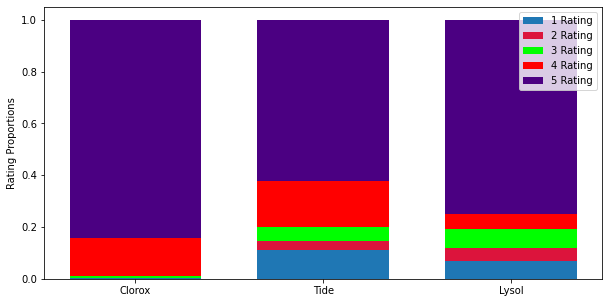

In [47]:
onestar=np.array([.002710,.112184,0.068452])
twostar=np.array([.001121,.032875,0.050595])
threestar=np.array([.008131,.053306,0.074405])
fourstar =np.array([.144112,.177935,0.056548])
fivestar=np.array([.843925,.6237,.750000])

labels = ["Clorox",'Tide','Lysol']
width = .7

fig,ax = plt.subplots(figsize = (10,5))

ax.bar(labels,onestar,width,label = '1 Rating' )
ax.bar(labels,twostar,width,label = '2 Rating', bottom=onestar,  color = 'crimson')
ax.bar(labels,threestar,width,label = '3 Rating',bottom = onestar+twostar ,color= 'lime' )
ax.bar(labels,fourstar,width,label = '4 Rating',bottom = onestar+twostar+threestar,color ='red')
ax.bar(labels,fivestar,width,label = '5 Rating' ,bottom = onestar+twostar+threestar+fourstar,color = 'indigo')
ax.set_ylabel('Rating Proportions')
ax.legend()

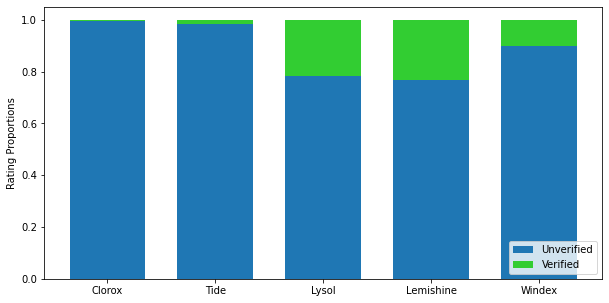

In [57]:
notverified=np.array([0.997025,0.983828,0.785075,0.76699,0.89939])
isverified =np.array([0.002975,0.016172,0.214925,0.233,0.1006])


labels = ["Clorox",'Tide','Lysol','Lemishine','Windex']
width = .7

fig,ax = plt.subplots(figsize = (10,5))

ax.bar(labels,notverified,width,label = 'Unverified' )
ax.bar(labels,isverified,width,label = 'Verified', bottom=notverified,  color = 'limegreen')



ax.set_ylabel('Rating Proportions')
ax.legend(loc = 'lower right')

In [ ]:
import scipy.stats as stats
lys = branddat[branddat['brand']=='Lysol']
tid = branddat[branddat['brand']=='Tide']
clor = branddat[branddat['brand']=='Clorox']
household = branddat['reviewsrating']

lys['didPurchase'].value_counts()
clor['didPurchase'].value_counts()
tid['didPurchase'].value_counts()
household['didPurchase'].value_counts()


stats.ttest_ind(clor['reviewsrating'],tid['reviewsrating'], equal_var = False)

# stats.ttest_ind(

In [ ]:
high_verify['reviewstitle'].value_counts().head(10)

In [ ]:
pandas_df['reviewsrating'].value_counts().plot.barh()

In [ ]:
beatclean= branddat['brand']
branddat['reviewsrating'].value_counts().plot.barh()

In [ ]:
nverifieddf = pandas_df[pandas_df['didPurchase']==False]
nverifieddf

In [ ]:
verify= verifieddf['brand'].value_counts(100).head(10)
nverify = nverifieddf['brand'].value_counts(100).head(10)
fig,ax = plt.subplots( figsize =(20,20))


plt.subplot(2,2,1)
ax2 = nverifieddf['brand'].value_counts().head(10).plot.barh(color = 'red')
ax2.set_title("Unverified Reviews")
ax2.set_xlabel("Review Count")
ax2.set_xlim()
for i, v in enumerate(nverify):
    ax2.text(v + 200, i, f'{str(round(v*100,2))}%', color='black', weight= 'bold' )
    
plt.subplot(2,2,2)
ax3 = verifieddf['brand'].value_counts().head(10).plot.barh(color = 'green')
ax3.set_title("Verified Reviews")
ax3.set_xlabel("Review Count")
ax3.set_xlim()
for i, v in enumerate(verify):
    ax3.text(v + 15, i, f'{str(round(v*100,2))}%', color='black',weight = 'bold' )

fig.suptitle('Verified vs Unverified Top 10',y =.51)   
plt.tight_layout

plt.figure


In [ ]:
totalpercent= pandas_df['brand'].value_counts(100).head(10)

fix, ax = plt.subplots(figsize =(10,5))
ax1 = totalpercent.plot.barh(color = 'dodgerblue')
ax1.set_title('Total Reviews')
ax1.set_xlim(0,.2)
for i, v in enumerate(totalpercent):
    ax1.text(v + .005, i, f'{str(round(v*100,2))}%', color='black' )
    
# ax1.annotate()

In [ ]:
pandas_df['brand'].value_counts()


In [ ]:
clordf = pandas_df[pandas_df['brand']=="Clorox"]
clordf

fig,ax = plt.subplots(figsize = (10,5))

ax.hist(clordf['reviewsrating'],bins = np.linspace(0,5),color = 'red')

ax.set_xlabel('Review Rating')
ax.set_ylabel('No. Reviews')
ax.set_title('Clorox Rating Totals')


In [ ]:


fig,ax = plt.subplots(figsize = (10,5))

ax.hist(lysol['reviewsrating'],bins = np.linspace(0,5),color = 'green')

ax.set_xlabel('Review Rating')
ax.set_ylabel('No. Reviews')
ax.set_title('Lysol Rating Totals')


In [ ]:
len(tide[tide['didPurchase'] == True])

In [ ]:


fig,ax = plt.subplots(figsize = (10,5))

ax.hist(tide['reviewsrating'],bins = np.linspace(0,5),color = 'orange')

ax.set_xlabel('Review Rating')
ax.set_ylabel('No. Reviews')
ax.set_title('Tide Rating Totals')


In [ ]:
clordf['upc'].value_counts()


In [ ]:
olay=pandas_df[pandas_df['brand']=="Olay"]
olay['upc'].value_counts()

In [ ]:
lysol=pandas_df[pandas_df["brand"]=='Lysol']
lysol['upc'].value_counts()

In [ ]:
lysol['upc'].value_counts(100)

In [ ]:
pandas_df['didPurchase'].value_counts()

In [ ]:
tide = pandas_df[pandas_df['brand']== 'Tide']
tide['upc'].value_counts()

In [ ]:
loreal1=pandas_df[pandas_df["brand"]== "L'Oreal Paris" ]

loreal2= pandas_df[pandas_df["brand"]== "L'oreal Paris"]
loreal=loreal1.append(loreal2)
loreal['upc'].value_counts()

In [ ]:
maybel = pandas_df[pandas_df['brand']=='Maybelline']
maybel['upc'].value_counts()

In [ ]:
verifieddf['reviewsrating'].value_counts()

In [ ]:
nverifieddf['brand'].value_counts().head(20)


In [ ]:
high_unverified= nverifieddf[nverifieddf['reviewsrating']>3]
nverifieddf['brand'].value_counts()

In [ ]:
verifieddf['brand'].value_counts().head(20)

In [ ]:
pandas_df[''].value_counts()

In [ ]:
verifieddf = pandas_df[pandas_df["didPurchase"] == True]
verifieddf

In [ ]:
verifieddf['brand'].value_counts()

In [ ]:
verifieddf['brand'].unique()

In [ ]:
len(verifieddf['brand'].unique())

In [ ]:
low_verified= verifieddf[verifieddf['reviewsrating']<3]
low_verified

In [ ]:
high_verified = verifieddf[verifieddf['reviewsrating']>3]
len(verifieddf[verifieddf['brand']=='Clorox'])

In [ ]:
Tide=pandas_df[pandas_df['brand']=='Tide']
Tide['reviewsrating'].value_counts(100)

In [ ]:
pandas_df['brand'].value_counts().head(10)


In [ ]:
len(brand)

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))


ax.hist(pandas_df['reviewsrating'])
plt.xlabel('Review Rating')
plt.ylabel('No. Reviews')
plt.title('Review Ratings Total')
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))

ax.hist(verifieddf['reviewsrating'], color = 'blue',alpha =.5)
ax.hist(pandas_df['reviewsrating'],color ='red',alpha =.5)
ax.set_xlabel('Review Rating')
ax.set_ylabel('No. Reviews')
ax.set_title('Verified Ratings Total')

plt.show()

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))

ax.hist(verifieddf['reviewsrating'], color = 'blue',alpha =.5)

ax.set_xlabel('Review Rating')
ax.set_ylabel('No. Reviews')
ax.set_title('Verified Ratings Total')

plt.show()

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))

# ax.hist(verifieddf['reviewsrating'])
ax.hist(nverifieddf['reviewsrating'],color = 'orange')
plt.xlabel('Review Rating')
plt.ylabel('No. Reviews')
plt.title('Unverified Ratings Total')
plt.show()


In [ ]:
textlst = pandas_df['reviewstitle']
retstring = []
for i in textlst:
    if type(i) == str:
        retstring.append(i.lower()) 
titled={}
for i in retstring:
    if i not in titled:
        titled[i]= 0
    titled[i]+= 1 
titled
{k: v for k, v in sorted(titled.items(), key=lambda item: item[1],reverse = True)}

In [ ]:
verifieddf[verifieddf['URL'].str.contains('walmart')]

In [ ]:
nverifieddf[nverifieddf['URL'].str.contains('walmart')]

In [ ]:
textlst = verifieddf['reviewstitle'].tolist()
vretstring = []
for i in textlst:
    if type(i) == str:
        vretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in vretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}
# total verified review titles 

In [ ]:
len(verifieddf)

In [ ]:
textlst = nverifieddf['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

totalcounts = 0
for k,v in dicts.items():
    if "clorox" in k or 'olay' in k or 'tide'in k:
        totalcounts+= v

#total unverified review title words 

In [ ]:
clowipe= pandas_df[pandas_df['reviewstitle']=='clorox wipes']

In [ ]:
clowipe[clowipe['doRecommend']==True]

In [ ]:
onlyclor= pandas_df[pandas_df['brand']=='Clorox']
onlyclor

In [ ]:
len(nverifieddf)

In [ ]:
high_verify= verifieddf[verifieddf['reviewsrating']== 5]
textlst = high_verify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}
#  verified reviews with high ratings 

In [ ]:
high_verify['reviewstitle'].value_counts().head(10)


In [ ]:
fig, ax = plt.subplots()
verifyhigh = high_verify['reviewstitle'].value_counts().head(20)
ax = verifyhigh.plot.barh(color ='mediumaquamarine')
ax.set_xlabel('Number of Titles')
ax.set_title('Verified Purchase 5 Rating')



In [ ]:
low_verify= verifieddf[verifieddf['reviewsrating']== 1]
textlst = low_verify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

# verfified reviews  with low rating

In [ ]:
fig, ax = plt.subplots()
lowverified= low_verify['reviewstitle'].value_counts().head(20)
ax=lowverified.plot.barh(color = 'orange')
ax.set_xlabel('Number of Titles')
ax.set_title('Verified Purchase 1 Rating')

In [ ]:
low_nverify= nverifieddf[nverifieddf['reviewsrating']== 1]
textlst = low_nverify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())



#low unverified ratings for products 

In [ ]:
fig, ax = plt.subplots()

lownverify= low_nverify['reviewstitle'].value_counts().head(20)
ax = lownverify.plot.barh(color = 'crimson')

ax.set_xlabel('Number of Titles')
ax.set_title('Unverified Purchase 1 Rating')


In [ ]:
high_nverify= nverifieddf[nverifieddf['reviewsrating']== 5]
textlst = high_nverify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

#high unverified ratings for product

In [ ]:
highnverify = high_nverify['reviewstitle'].value_counts().head(20)
fig,ax = plt.subplots()
ax = highnverify.plot.barh(color = 'red')
ax.set_xlabel("Number of Titles")
ax.set_ylabel('Titles')
ax.set_title("Unverified 5 Rating")

In [ ]:
allclorox=pandas_df[pandas_df['brand'].str.contains('Clorox')]
len(allclorox)

In [ ]:
cloroxnv= nverifieddf[nverifieddf['brand'].str.contains('Clorox')]
len(cloroxnv)

In [ ]:
cloroxv= verifieddf[verifieddf['brand'].str.contains('Clorox')]
len(cloroxv)


In [ ]:
Clorox 